# Pymaceuticals Inc.
---

### Analysis

1. Drug Regimen Efficacy (Based on Summary Statistics and Box Plot):
- The summary statistics and box plot of the final tumor volumes indicate significant differences in efficacy among the drug regimens. Capomulin and Ramicane, in particular, show lower mean and median tumor volumes compared to other treatments like Infubinol and Ceftamin. This suggests that Capomulin and Ramicane might be more effective in reducing the size of the tumors. Additionally, the box plot reveals that Infubinol has an outlier, indicating variability in its efficacy.

2. Gender Distribution (Based on Pie Charts):
- The pie charts displaying the distribution of female versus male mice show a relatively balanced representation of both genders in the study. This balance is important for ensuring that the study results are not biased due to gender-specific responses to the drug regimens.

3. Correlation Between Mouse Weight and Tumor Volume (Based on Scatter Plot and Correlation Coefficient):
- The scatter plot and the correlation coefficient of approximately 0.84 for the Capomulin regimen suggest a strong positive correlation between mouse weight and tumor volume. Mice with higher weight tend to have larger tumor volumes. This relationship might be important for considering the dosage and effectiveness of the drug regimen, as weight could be a contributing factor to the variability in tumor response.

These observations offer valuable insights into the effectiveness of different drug regimens on tumor development, the importance of gender balance in clinical studies, and the potential impact of physiological factors like weight on treatment outcomes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice
duplicate_mice_ids

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
# Duplicate mouse ID
duplicate_mouse_id = 'g989'  
full_data = merged_data
duplicate_mouse_data = full_data[full_data['Mouse ID'] == 'g989']
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'] != 'g989'].head()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice_count = clean_data['Mouse ID'].nunique()
updated_unique_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Grouping by 'Drug Regimen'
grouped_data = clean_data.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Calculating each statistic separately
mean_tumor_vol = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_data['Tumor Volume (mm3)'].median()
var_tumor_vol = grouped_data['Tumor Volume (mm3)'].var()
std_tumor_vol = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_data['Tumor Volume (mm3)'].sem()

# Assembling the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": var_tumor_vol,
    "Tumor Volume Std. Dev.": std_tumor_vol,
    "Tumor Volume SEM": sem_tumor_vol
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Generating summary statistics for each drug regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

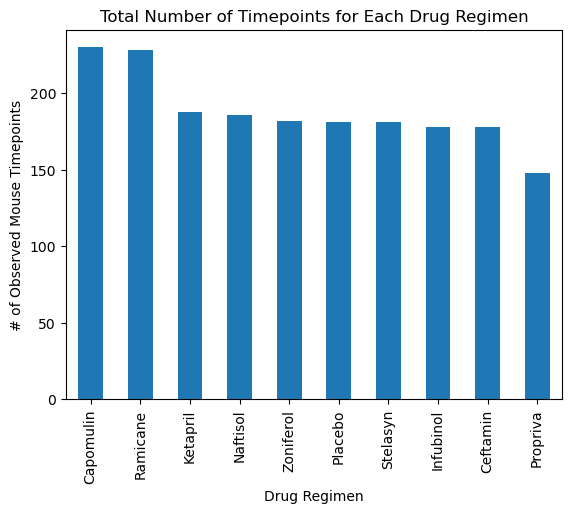

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Data for bar charts - total number of timepoints for each drug regimen
bar_chart_data = clean_data['Drug Regimen'].value_counts()

# Bar Chart using Pandas
bar_chart_pandas = bar_chart_data.plot(kind='bar', title="Total Number of Timepoints for Each Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


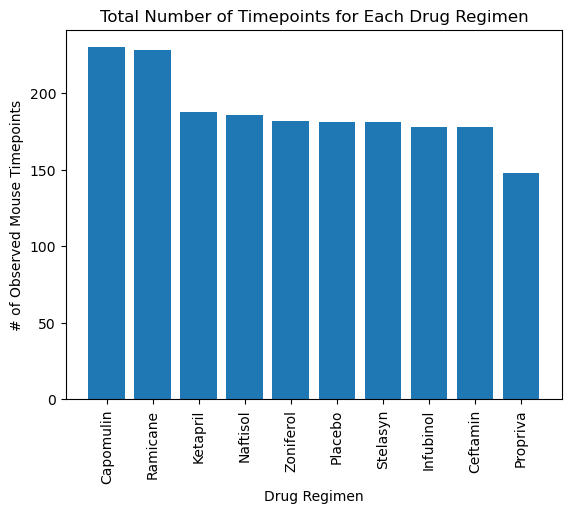

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Bar Chart using Matplotlib's pyplot
plt.bar(bar_chart_data.index, bar_chart_data.values)
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

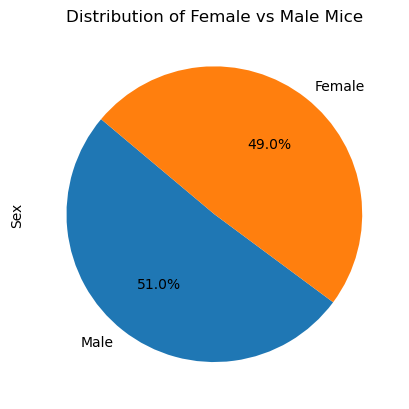

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Define pie_chart_data with the counts of female and male mice
pie_chart_data = clean_data['Sex'].value_counts()

# Pie Chart using Pandas
pie_chart_pandas = pie_chart_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, title="Distribution of Female vs Male Mice")
plt.ylabel('Sex')
plt.show()



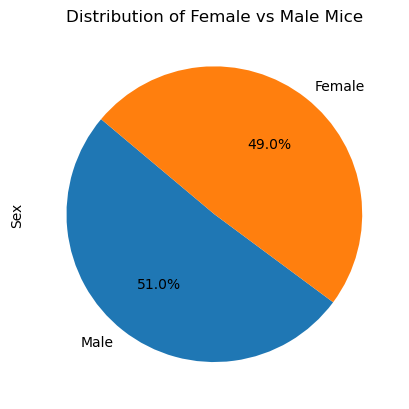

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pie Chart using Matplotlib's pyplot
plt.pie(pie_chart_data, labels=pie_chart_data.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how="left")

# Filtering the DataFrame for the four treatment regimens
merged_last_timepoint = merged_last_timepoint[merged_last_timepoint['Drug Regimen'].isin(treatment_list)]

# Displaying the first few rows of the merged DataFrame
merged_last_timepoint.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:
# Lists to hold tumor volume data
tumor_vol_list = []

# Looping through each drug in the treatment list
for drug in treatment_list:
    # Final tumor volume for each mouse treated with the drug
    final_tumor_vol = merged_last_timepoint.loc[merged_last_timepoint['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


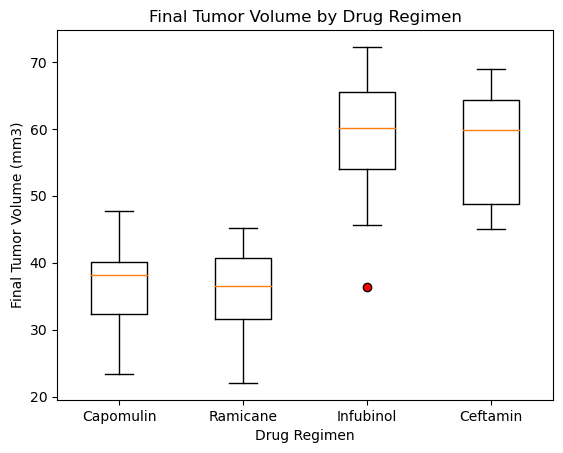

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops={'markerfacecolor': 'red'})
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

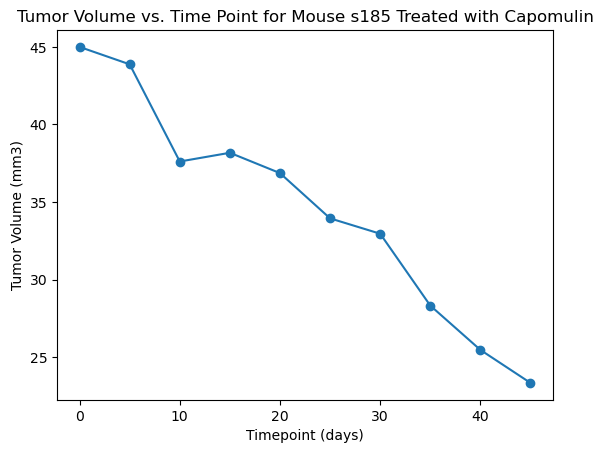

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Selecting a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]  
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generating a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

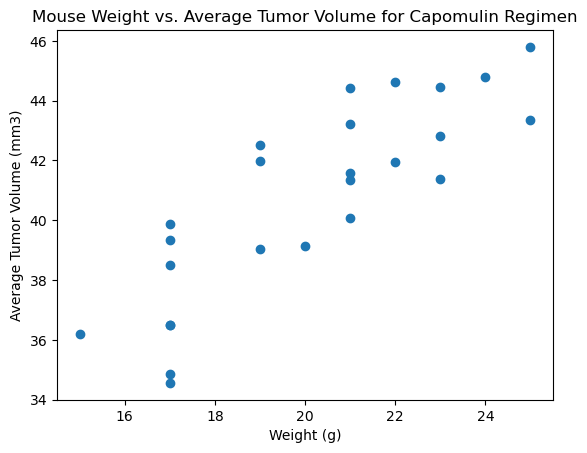

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Grouping by 'Mouse ID' and calculating the mean for 'Tumor Volume (mm3)' and 'Weight (g)'
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Generating a scatter plot of mouse weight vs. average observed tumor volume
plt.scatter(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

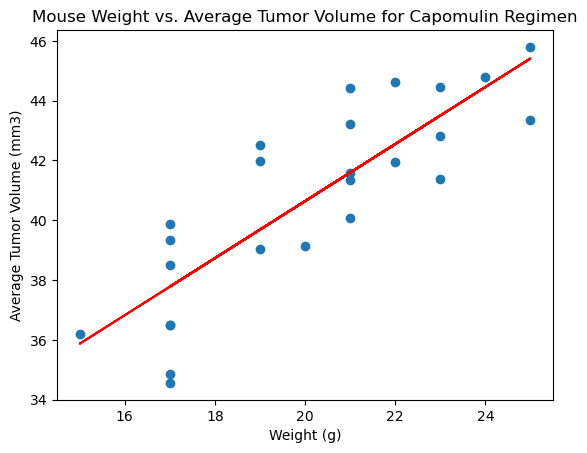

The correlation between mouse weight and the average tumor volume is 0.84


In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'])
regress_values = average_tumor_vol['Weight (g)'] * slope + intercept

# Plotting the linear regression model on top of the scatter plot
plt.scatter(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'])
plt.plot(average_tumor_vol['Weight (g)'], regress_values, "r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Calculating and displaying the correlation coefficient
correlation = average_tumor_vol['Weight (g)'].corr(average_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")